In [1]:
% pylab inline
plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (20, 10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
% load_ext autoreload
% reload_ext autoreload
% autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import rstoolbox as rs

## Saturation mutagenesis

In [4]:
filename = "scores.sc"

In [5]:
df = pd.read_csv(filename, sep="\s+")

In [6]:
tags = df["SCORE:"].str.replace(pat="out_|:SCORE:", repl="").str.replace(pat='\d+', repl='').str.replace(pat="_", n=1, repl=" ").as_matrix()

In [7]:
df["tags"] = pd.Series(tags, name="tags")

In [8]:
scores = df["score"]
ddg = df["ddg"]

In [9]:
# Map wt
df_wt = df.iloc[np.where(tags == " TYR_LYS_ARG")]
wt_score = float(df_wt["score"])
wt_ddg = float(df_wt["ddg"])
wt_txt = " TYR_LYS_ARG"

In [10]:
wt_score, wt_ddg

(-1653.922, -127.744)

## Best mutations

In [11]:
top_ddg = 50
top_score = 50

In [12]:
df_ddg = df.sort_values("ddg").head(top_ddg)[["score", "ddg", "tags"]]
df_score = df.sort_values("score").head(top_score)[["score", "ddg", "tags"]]

In [13]:
#df_ddg.to_csv("topByDdg")

In [14]:
#df_score.to_csv("topByScore")

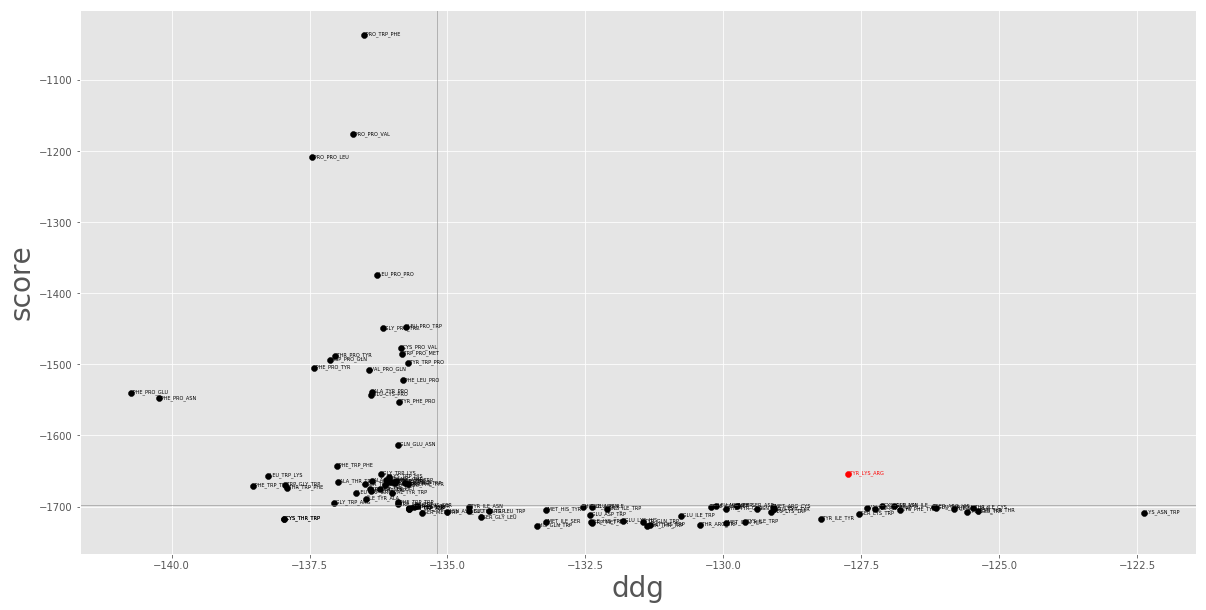

In [15]:
fig, ax = plt.subplots()
ax.scatter(df_ddg["ddg"], df_ddg["score"], color="black")
ax.scatter(df_score["ddg"], df_score["score"], color="black")
ax.scatter(wt_ddg, wt_score, color="red")
ax.annotate(wt_txt, (wt_ddg,wt_score), color="red", size=5)
for i, txt_ddg in enumerate(df_ddg["tags"]):
    ax.annotate(txt_ddg, (df_ddg["ddg"].tolist()[i],df_ddg["score"].tolist()[i]), size=5)
for i, txt_score in enumerate(df_score["tags"]):   
    ax.annotate(txt_score, (df_score["ddg"].tolist()[i],df_score["score"].tolist()[i]), size=5)

plt.axvline(x=max(df_ddg["ddg"])+.5, linewidth=0.5, color="grey")
plt.axhline(y=max(df_score["score"])+.5, linewidth=0.5, color="grey")

plt.xlabel("ddg", fontsize=28)
plt.ylabel("score", fontsize=28)


#plt.savefig("satmut_top20.png", format="png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

## Extract best decoys

In [16]:
silentfile = "satmut_16_18_33.minisilent.gz"

In [17]:
# Load fasta file or rosetta silent files
definitions = {"scores": "*", "sequence" : "B"}
df = rs.io.parse_rosetta_file(silentfile, definitions)

In [18]:
df_clean = df.sort_values("score").head(100)

In [19]:
df_ddg = df_clean.sort_values("ddg").head(100)

In [20]:
df_ddg = df_ddg[df_ddg["ddg"] < -120.0]

In [21]:
df_ddg.head(20)

,score,fa_atr,fa_rep,fa_sol,fa_intra_rep,fa_intra_sol_xover4,lk_ball_wtd,fa_elec,pro_close,hbond_sr_bb,...,fa_dun,p_aa_pp,yhh_planarity,ref,rama_prepro,ddg,silent_score,time,description,sequence_B
1937,-1716.924,-9569.963,1288.944,6812.372,21.449,524.203,-343.227,-2458.663,15.780,-521.64,...,2700.967,-191.591,2.165,164.694,127.942,-137.964,-1716.923,100.0,CYS_THR_TRP_5vw1_0001,SMNINDLIREIKNKDYCVTLSGTDSNSITQLIIWVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
3141,-1694.628,-9561.967,1289.093,6815.414,21.473,523.785,-341.549,-2453.614,15.439,-521.64,...,2702.400,-190.133,2.164,160.991,128.627,-137.059,-1694.628,98.0,GLY_TRP_ARG_5vw1_0001,SMNINDLIREIKNKDYGVWLSGTDSNSITQLIIRVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
3960,-1689.859,-9562.823,1285.739,6803.298,21.455,524.000,-341.548,-2438.855,15.533,-521.64,...,2706.775,-191.641,2.012,162.237,127.191,-136.474,-1689.860,94.0,ILE_TYR_ALA_5vw1_0001,SMNINDLIREIKNKDYIVYLSGTDSNSITQLIIAVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
7017,-1696.934,-9573.921,1290.269,6810.560,21.503,524.925,-341.876,-2450.545,15.792,-521.64,...,2716.266,-191.562,2.147,164.210,128.007,-135.903,-1696.934,100.0,TRP_LEU_TRP_5vw1_0001,SMNINDLIREIKNKDYWVLLSGTDSNSITQLIIWVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
5557,-1694.274,-9575.725,1290.530,6812.799,21.497,524.538,-341.293,-2446.744,15.615,-521.64,...,2712.528,-191.386,2.080,163.767,128.284,-135.894,-1694.274,98.0,PHE_TRP_TRP_5vw1_0001,SMNINDLIREIKNKDYFVWLSGTDSNSITQLIIWVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
2343,-1703.166,-9565.459,1285.517,6817.900,21.463,525.844,-342.461,-2455.988,15.622,-521.64,...,2709.561,-192.144,2.172,156.691,126.871,-135.700,-1703.167,99.0,GLN_TRP_ASP_5vw1_0001,SMNINDLIREIKNKDYQVWLSGTDSNSITQLIIDVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
2178,-1702.314,-9572.423,1286.385,6820.095,21.474,525.986,-341.762,-2450.118,15.724,-521.64,...,2709.570,-191.227,2.155,156.857,127.132,-135.688,-1702.314,95.0,GLN_HIS_TYR_5vw1_0001,SMNINDLIREIKNKDYQVHLSGTDSNSITQLIIYVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
7216,-1700.581,-9563.405,1289.366,6809.668,21.452,524.495,-342.814,-2447.946,15.771,-521.64,...,2699.234,-190.291,2.272,161.085,128.368,-135.612,-1700.580,102.0,TYR_ALA_THR_5vw1_0001,SMNINDLIREIKNKDYYVALSGTDSNSITQLIITVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
6175,-1698.694,-9561.858,1286.112,6812.764,21.411,524.883,-344.045,-2443.263,15.541,-521.64,...,2699.424,-190.761,2.096,157.147,127.793,-135.545,-1698.694,96.0,SER_HIS_SER_5vw1_0001,SMNINDLIREIKNKDYSVHLSGTDSNSITQLIISVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
6257,-1709.101,-9570.770,1286.468,6811.353,21.454,524.856,-342.790,-2450.999,15.722,-521.64,...,2705.479,-191.231,2.185,161.655,128.533,-135.459,-1709.102,100.0,SER_MET_TRP_5vw1_0001,SMNINDLIREIKNKDYSVMLSGTDSNSITQLIIWVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE


In [22]:
#rs.io.make_structures( df_ddg, outdir="topDdg_clean" )

In [23]:
df_score = df.sort_values("score").head(10)

In [24]:
df_score.head(20)

,score,fa_atr,fa_rep,fa_sol,fa_intra_rep,fa_intra_sol_xover4,lk_ball_wtd,fa_elec,pro_close,hbond_sr_bb,...,fa_dun,p_aa_pp,yhh_planarity,ref,rama_prepro,ddg,silent_score,time,description,sequence_B
3317,-1727.641,-9573.651,1284.007,6818.993,21.447,524.901,-341.631,-2460.842,15.892,-521.64,...,2704.623,-191.412,2.307,158.536,128.109,-133.374,-1727.640,103.0,HIS_GLN_TRP_5vw1_0001,SMNINDLIREIKNKDYHVQLSGTDSNSITQLIIWVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
6337,-1727.282,-9569.175,1286.666,6814.087,21.439,524.748,-341.889,-2458.644,15.666,-521.64,...,2696.649,-191.379,2.291,161.150,128.378,-131.381,-1727.281,104.0,SER_THR_TRP_5vw1_0001,SMNINDLIREIKNKDYSVTLSGTDSNSITQLIIWVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
3037,-1725.341,-9571.359,1286.655,6819.819,21.453,524.336,-340.706,-2462.738,15.579,-521.64,...,2699.763,-190.328,2.246,160.371,129.007,-131.330,-1725.340,106.0,GLY_LYS_TRP_5vw1_0001,SMNINDLIREIKNKDYGVKLSGTDSNSITQLIIWVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
6437,-1725.332,-9575.403,1285.657,6820.599,21.450,524.404,-342.164,-2458.050,15.738,-521.64,...,2700.072,-191.591,2.268,161.345,128.042,-130.423,-1725.332,109.0,THR_ARG_TRP_5vw1_0001,SMNINDLIREIKNKDYTVRLSGTDSNSITQLIIWVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
4908,-1722.937,-9566.859,1281.791,6818.377,21.435,525.294,-342.895,-2456.394,15.630,-521.64,...,2699.790,-191.310,2.299,157.932,127.491,-129.942,-1722.935,112.0,MET_GLN_HIS_5vw1_0001,SMNINDLIREIKNKDYMVQLSGTDSNSITQLIIHVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
7058,-1722.753,-9573.542,1282.598,6817.009,21.511,524.332,-343.588,-2456.506,15.511,-521.64,...,2703.370,-191.252,2.304,162.527,127.272,-132.377,-1722.754,110.0,TRP_MET_TYR_5vw1_0001,SMNINDLIREIKNKDYWVMLSGTDSNSITQLIIYVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
1797,-1721.933,-9573.130,1286.421,6816.044,21.456,524.792,-342.795,-2456.022,15.683,-521.64,...,2696.542,-191.894,2.270,165.846,127.716,-129.609,-1721.932,108.0,CYS_ILE_TRP_5vw1_0001,SMNINDLIREIKNKDYCVILSGTDSNSITQLIIWVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
4995,-1721.574,-9563.327,1284.393,6814.448,21.448,523.961,-342.160,-2457.086,15.716,-521.64,...,2694.323,-191.127,2.294,161.698,127.430,-133.208,-1721.574,109.0,MET_ILE_SER_5vw1_0001,SMNINDLIREIKNKDYMVILSGTDSNSITQLIISVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
3777,-1721.305,-9578.644,1287.384,6818.673,21.477,524.829,-341.850,-2455.617,15.682,-521.64,...,2704.453,-191.979,2.270,162.291,127.749,-132.405,-1721.306,110.0,ILE_HIS_TRP_5vw1_0001,SMNINDLIREIKNKDYIVHLSGTDSNSITQLIIWVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
7317,-1721.229,-9577.499,1286.733,6822.859,21.480,525.633,-343.409,-2458.016,15.655,-521.64,...,2704.734,-191.358,2.338,159.419,127.985,-131.449,-1721.230,110.0,TYR_GLN_TRP_5vw1_0001,SMNINDLIREIKNKDYYVQLSGTDSNSITQLIIWVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE


In [25]:
#rs.io.make_structures( df_score, outdir="topScore" )